# Library imports

In [49]:
# 📦 Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# 📂 Préparation des données

In [50]:
# 📂 Préparation des données
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=20
)

In [51]:
train_data = datagen.flow_from_directory(
    '../dataset_corrige_animals/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 435 images belonging to 2 classes.


In [52]:
val_data = datagen.flow_from_directory(
    '../dataset_corrige_animals/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 108 images belonging to 2 classes.


In [53]:
# 📝 Vérification des classes
print(train_data.class_indices)

{'injured_animals': 0, 'not_injured_animals': 1}


In [54]:
# 📦 Modèle Transfer Learning
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze MobileNetV2

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
# 🛑 Callback pour éviter l'overfitting
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [56]:
# 🚀 Entraînement
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=[early_stop]
)

Epoch 1/15
14/14 [==============================] - 19s 1s/step - loss: 0.6673 - accuracy: 0.6138 - val_loss: 0.6527 - val_accuracy: 0.6204
Epoch 2/15
14/14 [==============================] - 12s 858ms/step - loss: 0.5364 - accuracy: 0.7241 - val_loss: 0.6217 - val_accuracy: 0.6667
Epoch 3/15
14/14 [==============================] - 14s 960ms/step - loss: 0.4677 - accuracy: 0.7885 - val_loss: 0.6134 - val_accuracy: 0.6759
Epoch 4/15
14/14 [==============================] - 17s 1s/step - loss: 0.3921 - accuracy: 0.8414 - val_loss: 0.5887 - val_accuracy: 0.6759
Epoch 5/15
14/14 [==============================] - 17s 1s/step - loss: 0.3649 - accuracy: 0.8322 - val_loss: 0.5486 - val_accuracy: 0.6944
Epoch 6/15
14/14 [==============================] - 24s 2s/step - loss: 0.3481 - accuracy: 0.8713 - val_loss: 0.5584 - val_accuracy: 0.6759
Epoch 7/15
14/14 [==============================] - 28s 2s/step - loss: 0.3103 - accuracy: 0.8506 - val_loss: 0.4967 - val_accuracy: 0.7593
Epoch 8/15
14/

In [57]:
# 📈 Courbes de précision et de perte
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

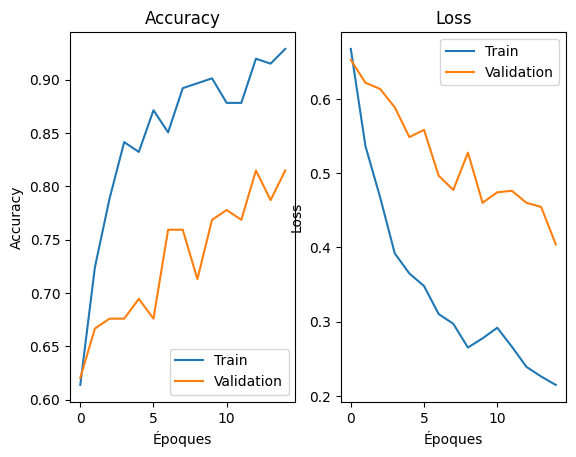

In [58]:
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Époques')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Époques')
plt.ylabel('Loss')
plt.legend()

plt.show()


# 📊 Évaluation finale

In [59]:
# 📊 Évaluation finale
val_loss, val_acc = model.evaluate(val_data)
print(f"\n✅ Validation Accuracy : {val_acc:.2f}")

4/4 [==============================] - 6s 1s/step - loss: 0.4308 - accuracy: 0.8056

✅ Validation Accuracy : 0.81


# 📏 Matrice de confusion

4/4 [==============================] - 10s 1s/step


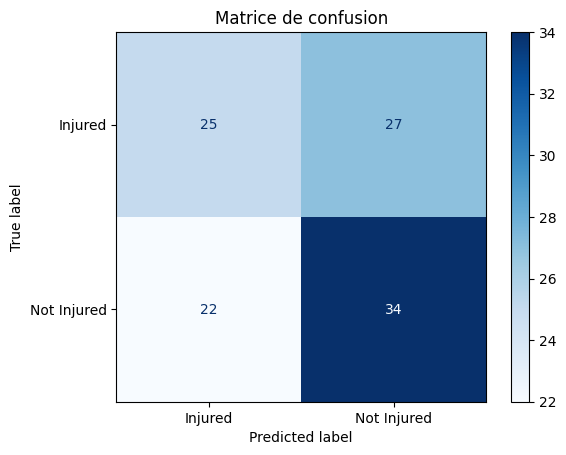

In [60]:
# 📏 Matrice de confusion
val_data.reset()
predictions = model.predict(val_data)
y_pred = (predictions > 0.5).astype(int).ravel()
y_true = val_data.classes

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Injured', 'Not Injured'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

In [61]:
# Rapport classification
print(classification_report(y_true, y_pred, target_names=['Injured', 'Not Injured']))

              precision    recall  f1-score   support

     Injured       0.53      0.48      0.51        52
 Not Injured       0.56      0.61      0.58        56

    accuracy                           0.55       108
   macro avg       0.54      0.54      0.54       108
weighted avg       0.55      0.55      0.54       108



# 💾 Sauvegarde du modèle

In [62]:
# 💾 Sauvegarde du modèle
model.save('injury_detector_model.h5')
print("✅ Modèle sauvegardé sous 'injury_detector_model.h5'")

✅ Modèle sauvegardé sous 'injury_detector_model.h5'
